In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import PIL
import os 
import cv2

In [3]:
data_dir='E:/openCV/SignLanguage/New'

In [4]:
data_dir

'E:/openCV/SignLanguage/New'

In [5]:
import pathlib
data_dir = pathlib.Path(str(data_dir))
data_dir

WindowsPath('E:/openCV/SignLanguage/New')

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

4969

In [7]:
myList = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [8]:
sign_images_dict ={}
for i in range(len(myList)):
    sign_images_dict[myList[i]]=list(data_dir.glob(myList[i]+'/*'))


In [9]:
sign_labels_dict ={}
for i in range(len(myList)):
    sign_labels_dict[myList[i]]=i

In [10]:
sign_labels_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'O': 13,
 'P': 14,
 'Q': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'W': 21,
 'X': 22,
 'Y': 23}

In [11]:
print(sign_images_dict.keys)

<built-in method keys of dict object at 0x000001D4F9DD1900>


In [12]:
img = cv2.imread(str(sign_images_dict['A'][0]))
img

array([[[161, 152, 142],
        [163, 154, 144],
        [168, 159, 149],
        ...,
        [172, 165, 150],
        [170, 163, 148],
        [169, 162, 147]],

       [[163, 154, 144],
        [166, 157, 147],
        [170, 161, 151],
        ...,
        [173, 166, 151],
        [171, 164, 149],
        [170, 163, 148]],

       [[167, 158, 148],
        [170, 161, 151],
        [174, 165, 155],
        ...,
        [174, 167, 152],
        [173, 166, 151],
        [172, 165, 150]],

       ...,

       [[189, 188, 174],
        [191, 190, 176],
        [194, 193, 179],
        ...,
        [192, 188, 170],
        [191, 187, 169],
        [190, 186, 168]],

       [[187, 186, 172],
        [189, 188, 174],
        [192, 191, 177],
        ...,
        [192, 188, 170],
        [190, 186, 168],
        [189, 185, 167]],

       [[185, 184, 170],
        [187, 186, 172],
        [191, 190, 176],
        ...,
        [191, 187, 169],
        [190, 186, 168],
        [189, 185, 167]]

In [13]:
img.shape

(150, 200, 3)

In [14]:
X,y = [],[]
for sign_name,images in sign_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(200,150))
    X.append(resized_img)
    y.append(sign_labels_dict[sign_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
len(X),len(y)

(4969, 4969)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [18]:
len(X_train),len(X_test)

(3726, 1243)

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
num_classes=len(myList)
model = models.Sequential([
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),  
                    layers.Flatten(),  
                    layers.Dense(128,activation='relu'),  
                    layers.Dense(num_classes)    
])
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
117/117 [==============================] - 205s 2s/step - loss: 2.7554 - accuracy: 0.2166
Epoch 2/10
117/117 [==============================] - 199s 2s/step - loss: 0.4920 - accuracy: 0.8484
Epoch 3/10
117/117 [==============================] - 172s 1s/step - loss: 0.1582 - accuracy: 0.9482
Epoch 4/10
117/117 [==============================] - 166s 1s/step - loss: 0.0589 - accuracy: 0.9805
Epoch 5/10
117/117 [==============================] - 145s 1s/step - loss: 0.0450 - accuracy: 0.9879
Epoch 6/10
117/117 [==============================] - 134s 1s/step - loss: 0.0326 - accuracy: 0.9888
Epoch 7/10
117/117 [==============================] - 139s 1s/step - loss: 0.0092 - accuracy: 0.9979
Epoch 8/10
117/117 [==============================] - 125s 1s/step - loss: 0.0682 - accuracy: 0.9809
Epoch 9/10
117/117 [==============================] - 174s 1s/step - loss: 0.0094 - accuracy: 0.9978
Epoch 10/10
117/117 [==============================] - 183s 2s/step - loss: 0.0104 - accura

In [21]:
model.evaluate(X_test_scaled,y_test)

39/39 [==============================] - 16s 401ms/step - loss: 0.0283 - accuracy: 0.9895


[0.028315583243966103, 0.9895414113998413]

In [22]:
predictions=model.predict(X_test_scaled)
predictions

array([[-10.793884 , -11.531988 ,  -3.4739044, ...,   2.094008 ,
          1.6286582,  -2.5663059],
       [ -7.5814257,  -9.892628 ,  -2.79886  , ...,   6.03234  ,
          2.981338 ,  -7.3898973],
       [-27.750185 ,  -8.870423 ,  -2.580169 , ...,  -1.0017763,
         11.534387 ,  -4.7374988],
       ...,
       [  4.653865 ,   6.8111672,   4.3432226, ...,  -0.6159287,
        -22.8847   ,   8.479479 ],
       [-10.2846775,  -7.331307 ,  -7.439412 , ...,  -6.0486116,
          5.950276 ,   7.123682 ],
       [  1.4022044,   4.9831543,   8.992238 , ..., -11.236909 ,
        -16.04838  ,   4.08273  ]], dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

10

In [28]:
myList[y_test[0]]

'L'

In [25]:
img_height,img_width =150,200
data_augmentation= models.Sequential([
                                    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
                                    layers.experimental.preprocessing.RandomRotation(0.1),
                                    layers.experimental.preprocessing.RandomContrast(0.1),
                                    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [26]:
num_classes=len(myList)
model1 = models.Sequential([
                    data_augmentation,
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),  
                    layers.Dropout(0.2),
                    layers.Flatten(),  
                    layers.Dense(128,activation='relu'),  
                    layers.Dense(num_classes)    
])
model1.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
model1.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
117/117 [==============================] - 197s 2s/step - loss: 3.1207 - accuracy: 0.0871
Epoch 2/10
117/117 [==============================] - 144s 1s/step - loss: 1.8329 - accuracy: 0.4408
Epoch 3/10
117/117 [==============================] - 141s 1s/step - loss: 1.1395 - accuracy: 0.6484
Epoch 4/10
117/117 [==============================] - 169s 1s/step - loss: 0.8658 - accuracy: 0.7315
Epoch 5/10
117/117 [==============================] - 175s 1s/step - loss: 0.6689 - accuracy: 0.7828
Epoch 6/10
117/117 [==============================] - 165s 1s/step - loss: 0.4934 - accuracy: 0.8474
Epoch 7/10
117/117 [==============================] - 178s 2s/step - loss: 0.4558 - accuracy: 0.8496
Epoch 8/10
117/117 [==============================] - 157s 1s/step - loss: 0.3344 - accuracy: 0.8876
Epoch 9/10
117/117 [==============================] - 169s 1s/step - loss: 0.3143 - accuracy: 0.8988
Epoch 10/10
117/117 [==============================] - 151s 1s/step - loss: 0.2933 - accura

In [27]:
model1.evaluate(X_test_scaled,y_test)

39/39 [==============================] - 19s 470ms/step - loss: 0.1393 - accuracy: 0.9590


[0.13927312195301056, 0.9589702486991882]

In [34]:
from tensorflow import keras

In [32]:
model.save("cnn_model_new")
model.save("cnn_modelh5.h5")

INFO:tensorflow:Assets written to: cnn_model_new\assets


In [35]:
new_model  = keras.models.load_model("cnn_modelh5.h5")

In [77]:
img = cv2.imread('A1.jpg')
img.shape

(200, 200, 3)

In [78]:
new_img = cv2.resize(img,(200,150))

In [79]:
new_img.shape

(150, 200, 3)

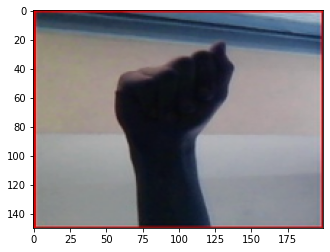

In [80]:
plt.imshow(new_img)

In [81]:
new_img=new_img.reshape(1,150,200,3)
new_img.shape

(1, 150, 200, 3)

In [82]:
prediction = model.predict(new_img)

In [88]:
score = tf.nn.softmax(prediction)
myList[np.argmax(score)]

'P'

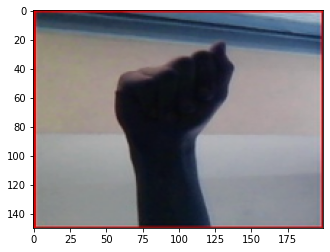

In [87]:
new_img=new_img.reshape(150,200,3)
plt.imshow(new_img)

In [89]:
model1.save("cnn_model_new_aug")
model1.save("cnn_model_augh5.h5")

INFO:tensorflow:Assets written to: cnn_model_new_aug\assets


In [90]:
import cv2
import numpy as np
import math
import joblib
import tensorflow as tf
from tensorflow import keras
cap = cv2.VideoCapture(0)
# mo = joblib.load('random_model_blur')
model  = keras.models.load_model("cnn_model_augh5.h5")
def prediction(img,model):
    myList = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
    new_img = cv2.resize(img,(200,150))
    new_img=new_img.reshape(1,150,200,3)
    prediction = model.predict(new_img)  
    score = tf.nn.softmax(prediction)
    print(str(myList[np.argmax(score)]))
    return str(myList[np.argmax(score)])
     
while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Got this from collect-data.py
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (200, 150)) 
    # roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # # _, test_image = cv2.threshold(roi, 200, 150, cv2.THRESH_BINARY_INV)
    # canny = cv2.Canny(roi,20,200)
    # cv2.imshow("canny1",canny)
    # canny  = cv2.GaussianBlur(canny,(5,5),0)
    
    # cv2.imshow("test", test_image)
    # cv2.imshow("canny",canny)
    result = prediction(roi,model)
    cv2.putText(frame,result, (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1) 
    cv2.imshow("Frame", frame)

    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break

     
cap.release()
cv2.destroyAllWindows()

D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
D
